<a href="https://colab.research.google.com/github/LatiefDataVisionary/eda-college-task/blob/main/tgs_eda_week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Mengimpor semua library yang diperlukan**

In [1]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


## **2. Mengupload dataset ke colab**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving customer_churn_dataset_training_master.csv to customer_churn_dataset_training_master.csv


## **3. Membaca file yang di-upload**

In [4]:
df = pd.read_csv(list(uploaded.keys())[0], sep=';')
print(df.head())

   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.

## **4. Mencari Missing Value**


In [5]:
missing_values = df.isnull().sum()
print("Missing values disetiap kolom:")
print(missing_values)

Missing values disetiap kolom:
CustomerID           1
Age                  2
Gender               3
Tenure               4
Usage Frequency      4
Support Calls        3
Payment Delay        2
Subscription Type    1
Contract Length      3
Total Spend          4
Last Interaction     2
Churn                1
dtype: int64


## **5. Mengatasi Missing Value**


### **a.  Mengisi missing values untuk kolom numerik dengan mean**


In [6]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-6-2e7964c9d568>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


### **b. Mengisi missing values untuk kolom kategorikal dengan mode**


In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-7-64ca4310aba6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


### **c. Menampilkan jumlah missing values setelah diisi**


In [8]:
missing_values_after = df.isnull().sum()
print("Missing values setelah diatasi:")
print(missing_values_after)

Missing values setelah diatasi:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


## **6. Mencari Outlier**

### **a. Menggunakan Boxplot untuk Semua Kolom Numerik**

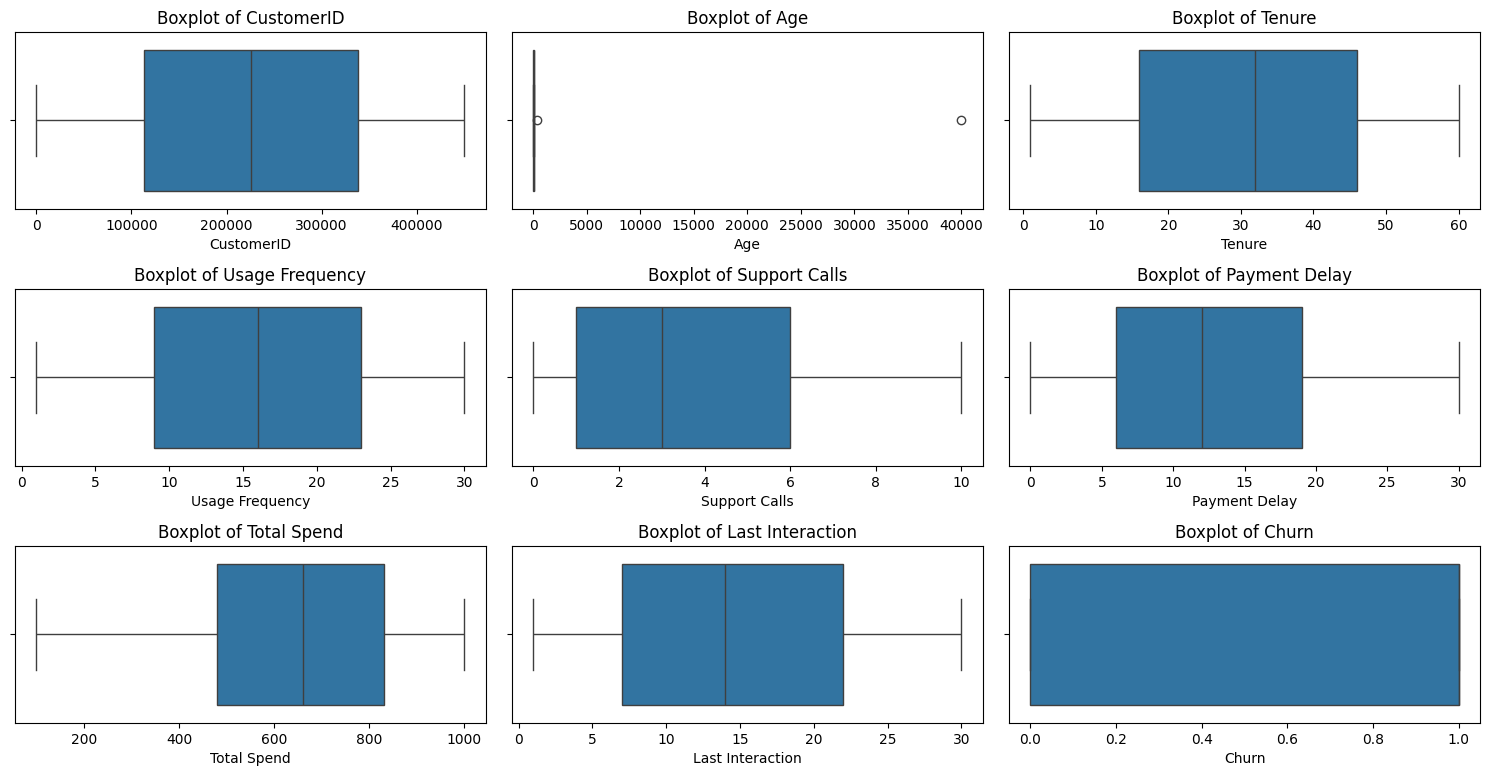

In [9]:
# Mengambil kolom numerik dari dataframe
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Membuat boxplot untuk setiap kolom numerik
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns)//3 + 1, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


### **b. Menggunakan Z-Score untuk Mendeteksi Outlier di Semua Kolom**

In [10]:
outliers_dict = {}

# Mendeteksi outlier menggunakan z-score untuk setiap kolom numerik
for col in numeric_columns:
    z_scores = np.abs(stats.zscore(df[col]))
    threshold = 3  # Z-score threshold
    outliers = df[z_scores > threshold]
    outliers_dict[col] = outliers
    print(f"Outliers in {col}:")
    print(outliers)

# menampilkan outlier di setiap kolom.
for col, outliers in outliers_dict.items():
    print(f"Jumlah outliers di {col}: {len(outliers)}")


Outliers in CustomerID:
Empty DataFrame
Columns: [CustomerID, Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, Last Interaction, Churn]
Index: []
Outliers in Age:
        CustomerID      Age Gender  Tenure  Usage Frequency  Support Calls  \
8             11.0    390.0   Male    12.0              5.0            7.0   
200141    204987.0  40000.0   Male    11.0              1.0            2.0   

        Payment Delay Subscription Type Contract Length  Total Spend  \
8                 4.0          Standard       Quarterly       969.00   
200141           24.0             Basic       Quarterly       731.33   

        Last Interaction  Churn  
8                   13.0    1.0  
200141              20.0    1.0  
Outliers in Tenure:
Empty DataFrame
Columns: [CustomerID, Age, Gender, Tenure, Usage Frequency, Support Calls, Payment Delay, Subscription Type, Contract Length, Total Spend, Last Interaction, Churn]
Index: []
Outli

## **7. Menangani Outlier menggunakan IQR (Interquartile Range) untuk deteksi dan penggantian**


In [11]:
# Menggunakan IQR untuk mendeteksi dan menangani outlier
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Batas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti outlier dengan batas
df['Age'] = np.where(df['Age'] > upper_bound, upper_bound, df['Age'])
df['Age'] = np.where(df['Age'] < lower_bound, lower_bound, df['Age'])


## **8. Membuat histogram untuk melihat distribusi data**



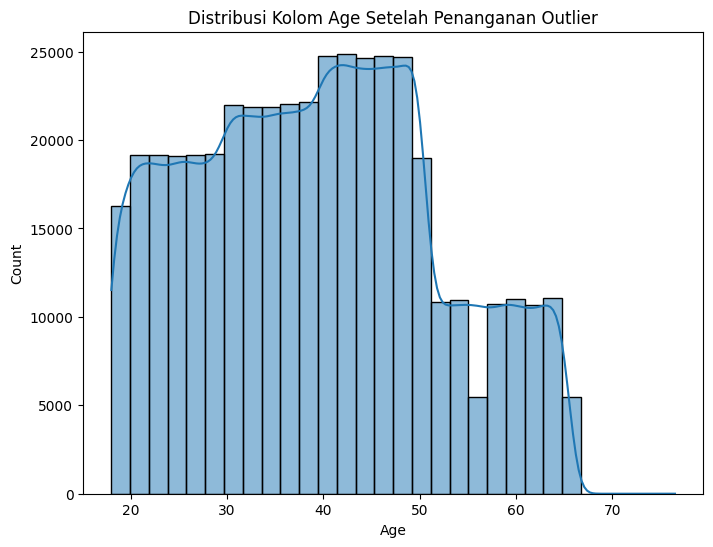

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribusi Kolom Age Setelah Penanganan Outlier')
plt.show()


## **9. Menyimpan dan mendownload file/data yang sudah dibersihkan**

In [13]:
# Menyimpan dataset yang sudah bersih ke file CSV baru
df.to_csv('cleaned_churn_dataset.csv', index=False)

# Mendownload file CSV yang sudah dibersihkan
files.download('cleaned_churn_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>